In [1]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
encoding_dim = 64

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)


In [4]:
autoencoder = Model(input_img,decoded)
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
x_train.ndim


3

In [14]:
x_train = x_train.astype('float32')/255

In [15]:
x_test = x_train.astype('float32')/255

In [16]:
x_train = x_train.reshape(len(x_train),(np.prod(x_train.shape[1:])))

In [18]:
x_test = x_test.reshape(len(x_test),(np.prod(x_test.shape[1:])))

In [17]:
x_train.shape

(60000, 784)

In [19]:
x_test.shape

(60000, 784)

In [27]:
autoencoder.fit(x_train,x_train,epochs=150,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/150
235/235 [==============================] - 4s 17ms/step - loss: 0.6725 - val_loss: 0.6899
Epoch 2/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6718 - val_loss: 0.6898
Epoch 3/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6711 - val_loss: 0.6898
Epoch 4/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6703 - val_loss: 0.6897
Epoch 5/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6696 - val_loss: 0.6896
Epoch 6/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6688 - val_loss: 0.6895
Epoch 7/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6680 - val_loss: 0.6894
Epoch 8/150
235/235 [==============================] - 4s 16ms/step - loss: 0.6672 - val_loss: 0.6894
Epoch 9/150
235/235 [==============================] - 4s 17ms/step - loss: 0.6663 - val_loss: 0.6893
Epoch 10/150
235/235 [==============================] - 4s 16ms/step - loss: 0.665

In [28]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [29]:
n =10
plt.figure(figsize=(20,4))


<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

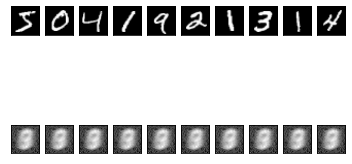

In [31]:
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()